# Calculation Exemple for $CO_2$

In [10]:

def tick_function(X):
        V = X*0.0241888425
        return ["%.0f" % z for z in V]

def au2fs(X):
        V = X*0.0241888425
        return V

def fs2au(X):
        V = X/0.0241888425
        return V
xlabeltime="Time (u.a.)"
ylabelchamp="Intensity (u.a.)"
ylabelpop="Population"
xlabelspectre="k"
ylabelspectre="Intensity"

[ 0  5 10 15]
[  0.         206.70687322 413.41374644 620.12061966]


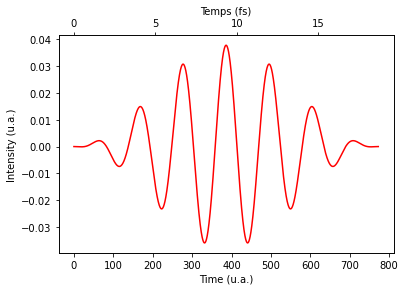

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

champ=np.loadtxt( 'champ.dat')
ax1 = plt.subplot(1, 1, 1)
ax1.plot(champ[:,0],champ[:,2],"r-")
plt.xlabel(xlabeltime)
plt.ylabel(ylabelchamp)
ax1R = ax1.twiny()
arrayenfs=np.arange(0,20,5)
print(arrayenfs)
arrayenua=fs2au(arrayenfs)
print(arrayenua)
new_tick_locations=arrayenfs
new_tick_locations=np.array([200])
ax1R.set_xlim(ax1.get_xlim())
ax1R.set_xticks(arrayenua)
ax1R.set_xticklabels(tick_function(arrayenua))
ax1R.set_xlabel(r"Temps (fs)")


plt.show()
plt.close()

[ 0  5 10 15]
[  0.         206.70687322 413.41374644 620.12061966]


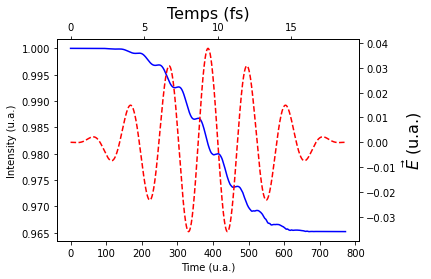

In [14]:
pop1=np.genfromtxt('CSF_Q.dat')
ax1=plt.subplot(1, 1, 1)
plt.plot(champ[:,0],pop1[:],"b-")
plt.xlabel(xlabeltime)
plt.ylabel(ylabelpop)


ax2 = ax1.twinx()
ax2.plot(champ[:,0],champ[:,2],"r--")
ax2.set_ylabel(r'$\vec{E}$ (u.a.)',fontsize=16)
ax1R = ax1.twiny()
arrayenfs=np.arange(0,20,5)
print(arrayenfs)
arrayenua=fs2au(arrayenfs)
print(arrayenua)
new_tick_locations=arrayenfs
new_tick_locations=np.array([200])
ax1R.set_xlim(ax1.get_xlim())
ax1R.set_xticks(arrayenua)
ax1R.set_xticklabels(tick_function(arrayenua))
ax1R.set_xlabel(r"Temps (fs)",fontsize=16)
ax1.set_ylabel(ylabelchamp)
plt.gcf().subplots_adjust(top=0.85,bottom=0.15,left=0.1,right=0.8)

plt.savefig('HCN_CSFQ.png')


plt.show()
plt.close()

dx= 0.020839752262619804
dy= 0.0


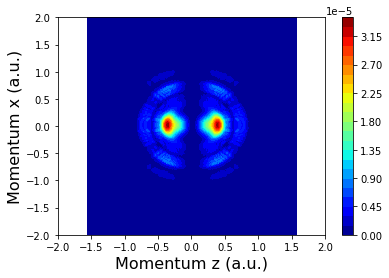

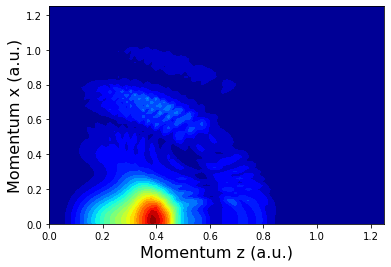

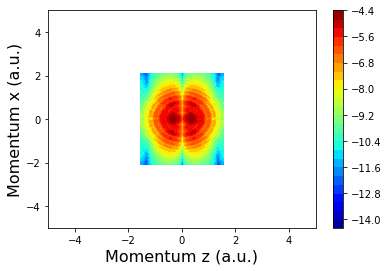

finish


In [16]:
import os
nbins=25
can=1
while(os.path.isfile('spectre2dXZ_canal0000'+str(can)+'.dat')):
  if(can<10):
    canal1_2d=np.loadtxt('spectre2dXZ_canal0000'+str(can)+'.dat')
  else:
    canal1_2d=np.loadtxt('spectre2dXZ_canal000'+str(can)+'.dat')
  canal1_2d=canal1_2d.transpose()
  fig4a = plt.figure()
  fig4a.canvas.set_window_title('spectre canal '+str(can))
  X=np.loadtxt('kx.dat')
  X=X.transpose()
  dx=X[0,1]-X[0,0]
  dx=X[1,0]-X[0,0]
  print("dx=",dx)
  Y=np.loadtxt('kzx.dat')
  Y=Y.transpose()
  dy=Y[1,0]-Y[0,0]
  print("dy=",dy)
  leveltot = plt.MaxNLocator(nbins=nbins).tick_values(canal1_2d.min(), canal1_2d.max())
  cf=plt.contourf(Y,X ,canal1_2d,levels=leveltot,cmap='jet')

  xmin=-2
  xmax=2.0
  zmin=-2
  zmax=2
  plt.axis([xmin, xmax, zmin, zmax])
  fig4a.colorbar(cf)
  FILESPECTRE2Dcanal1='HCN_spectre2dcanal'+str(can)+'.pdf'
  plt.ylabel('Momentum x (a.u.)',fontsize=16)
  plt.xlabel('Momentum z (a.u.)',fontsize=16)
  plt.savefig(FILESPECTRE2Dcanal1)
  plt.show()
  plt.close()
  
  # ZOOM
  xmin=0
  xmax=1.25
  zmin=0
  zmax=1.25
  leveltot = plt.MaxNLocator(nbins=nbins).tick_values(canal1_2d.min(), canal1_2d.max())
  cf=plt.contourf(Y,X ,canal1_2d,levels=leveltot,cmap='jet')


  plt.axis([xmin, xmax, zmin, zmax])
  fig4a.colorbar(cf)
  FILESPECTRE2Dcanal1='HCN_spectre2dcanal_zoom'+str(can)+'.pdf'
  plt.ylabel('Momentum x (a.u.)',fontsize=16)
  plt.xlabel('Momentum z (a.u.)',fontsize=16)
  plt.savefig(FILESPECTRE2Dcanal1)
  plt.show()
  plt.close()   
    
  fig4b = plt.figure()
  fig4b.canvas.set_window_title('spectre canal '+str(can)+' LOG')
  Z=np.log10(canal1_2d)
  #-18 a -25
  leveltot = plt.MaxNLocator(nbins=nbins).tick_values(Z.min(), Z.max())
  cfb=plt.contourf(Y,X ,Z,levels=leveltot,cmap='jet')
  LOGYMAX=5
  LOGZMAX=5
  plt.axis([-LOGYMAX, LOGYMAX, -LOGZMAX, LOGZMAX])
  fig4b.colorbar(cfb)
  FILESPECTRE2Dcanal1LOG='HCN_spectre2dcanal'+str(can)+'LOG.pdf'
  plt.ylabel('Momentum x (a.u.)',fontsize=16)
  plt.xlabel('Momentum z (a.u.)',fontsize=16)
  plt.savefig(FILESPECTRE2Dcanal1LOG)
  plt.show()
  plt.close()

  can=can+1
    
print('finish')
